In [64]:
import numpy as np
import cmath
import sympy as sp
import matplotlib.pyplot as plt 
import scipy as sci

from scipy import signal
from scipy.fft import fft, ifft, fftfreq
from sympy import Symbol
from sympy import poly, RR, CC
from sympy import degree_list
from matplotlib.ticker import FuncFormatter, MultipleLocator

In [65]:
def feed_forward(w):
    const = (1-np.exp(-1j *w)) 
    delayLine = 1
    for k in range(1, 5):
        delayLine *= 1 - np.exp((-1j * w)) * np.exp((-0.11j * np.pi * (2 * k - 1)))
        delayLine *= 1 - np.exp(-1j * w) * np.exp((0.11j * np.pi * (2 * k - 1)))
    delayLine *= const
    return delayLine
        
def feedback(w):
    delayLine = 1
    for k in range(1, 5):
        delayLine *= 1 - 0.9 * np.exp(-1j * w) * np.exp(-0.22j * np.pi * k)
        delayLine *= 1 - 0.9 * np.exp(-1j * w) * np.exp(0.22j * np.pi * k)
    delayLine *= 100
    return delayLine

def H_z(w):
    return feed_forward(w)/feedback(w)

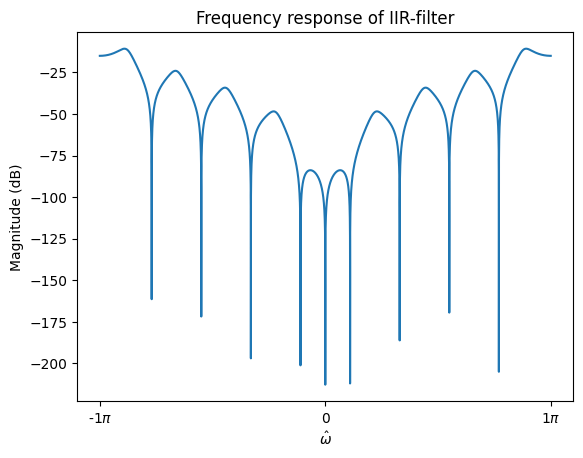

In [66]:
w = np.arange(-np.pi * 1, np.pi * 1, 0.000001)

fig, ax=plt.subplots(1)

plt.title("Frequency response of IIR-filter")
plt.xlabel(r'$\hat{\omega}$')
plt.ylabel('Magnitude (dB)')


#ax.set_yscale("log")
ax.plot(w, 10 * np.log(np.abs(H_z(w))))

ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=np.pi))

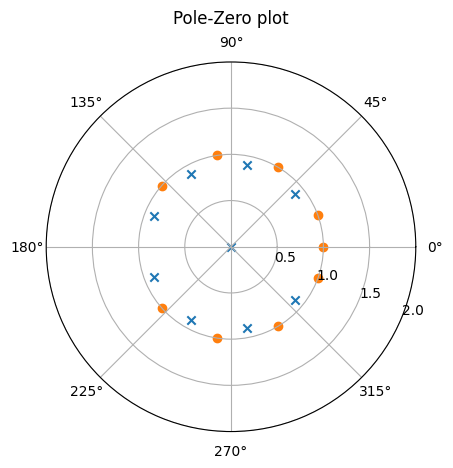

In [67]:
#gather all poles
def polesFunc(k):
    return 0.9 * np.exp(0.22j * np.pi * k)

def polesFuncConjugate(k):
    return 0.9 * np.exp(-0.22j * np.pi * k)

polesList = []
polesList.append(0)
for x in range(1, 5):
    polesList.append(polesFunc(x))
    polesList.append(polesFuncConjugate(x))
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

#gather all zeros
def zerosFunc(k):
    return np.exp(0.11j * np.pi * (2*k - 1))

def zerosFuncConjugate(k):
    return np.exp(-0.11j * np.pi * (2*k - 1))


zerosList = []
zerosList.append(1)
for x in range(1, 5):
    zerosList.append(zerosFunc(x))
    zerosList.append(zerosFuncConjugate(x))



ax.scatter(np.angle(polesList), np.abs(polesList), marker="x")
ax.scatter(np.angle(zerosList), np.abs(zerosList), marker="o")
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("Pole-Zero plot", va='bottom')
plt.show()

In [71]:
#feed-forward terms
z = sp.Symbol('z')
feedForwardList = []
feedForwardList.append((1 - z**-1))
for i in range (1, 5):
    feedForwardList.append((1 - z**-1 * sp.exp(-0.11j * sp.pi * (2 * i - 1))) * (1 - z**-1 * sp.exp(0.11j * sp.pi * (2 * i - 1))))
    feedForwardList[0] *= (1 - z**-1 * sp.exp(-0.11j * sp.pi * (2 * i - 1))) * (1 - z**-1 * sp.exp(0.11j * sp.pi * (2 * i - 1)))

num = sp.poly(feedForwardList[0], domain="CC")
num

Poly((-1.0 - 3.76074638369962e-17*I)*(1/z)**9 + (2.08675330006781 - 5.55111512312578e-16*I)*(1/z)**8 + (-2.21423338172873 + 8.46545056276682e-16*I)*(1/z)**7 + (2.27534819565895 + 7.21644966006352e-16*I)*(1/z)**6 + (-2.30204776144408 + 7.21644966006352e-16*I)*(1/z)**5 + (2.30204776144408 - 1.2490009027033e-15*I)*(1/z)**4 + (-2.27534819565895 - 6.10622663543836e-16*I)*(1/z)**3 + (2.21423338172873 + 1.38777878078145e-17*I)*(1/z)**2 + (-2.08675330006781 + 2.22044604925031e-16*I)*(1/z) + 1.0, 1/z, domain='CC')

In [72]:
#feedback terms
z = sp.Symbol('z')
fbList = []
fbList.append(1)
for i in range (1, 5):
    fbList[0] *= (1 - 0.9 * z**-1 * sp.exp(-0.22j * sp.pi * i)) * ((1 - 0.9 * z**-1 * sp.exp(0.22j * sp.pi * i)))

den = sp.poly(fbList[0], domain="CC")
den

Poly((0.43046721 - 2.0169585559055e-18*I)*(1/z)**8 + (0.433945004933642 - 2.22044604925031e-16*I)*(1/z)**7 + (0.5106211923468 + 8.32667268468867e-17*I)*(1/z)**6 + (0.543061324027405 + 4.44089209850063e-16*I)*(1/z)**5 + (0.627483992506356 + 3.33066907387547e-16*I)*(1/z)**4 + (0.670446079046179 + 7.7715611723761e-16*I)*(1/z)**3 + (0.77826732563146 - 1.66533453693773e-16*I)*(1/z)**2 + (0.816544084731215 - 4.44089209850063e-16*I)*(1/z) + 1.0, 1/z, domain='CC')

<StemContainer object of 3 artists>

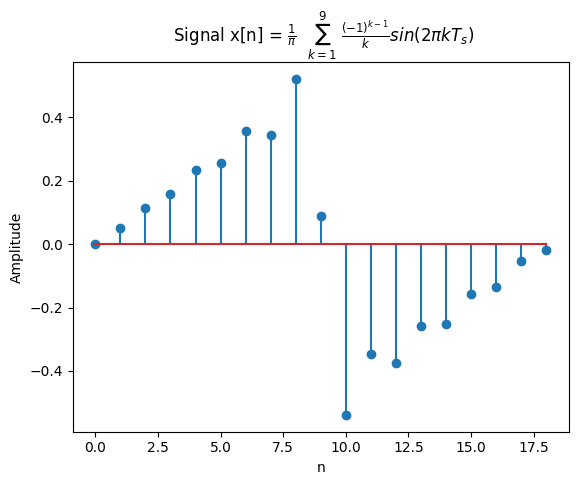

In [73]:
#signal
def x_t(t):
    s = 0;
    for k in range(1, 10):
        s += (((-1)**(k-1))/k) * np.sin(2 * np.pi * 220 * k * t)
    return (1 / np.pi) * s

ts = 1/4000
t = np.arange(0.0, 2* 0.0045, ts)
n = np.arange(0, 19, 1)

def x_n(n):
    s = 0;
    for k in range(1, 10):
        s += (((-1)**(k-1))/k) * np.sin(2 * np.pi * 220 * k * n * (1/4000))
    return (1 / np.pi) * s

plt.title(r' Signal x[n] = $\frac{1}{\pi}$  $\sum_{k=1}^9$ $\frac{(-1)^{k-1}}{k} sin(2\pi k T_s)$')
plt.xlabel("n")
plt.ylabel('Amplitude')
#plt.yticks(n)
#plt.plot(n, x_n(n))
plt.stem(n, x_n(n))

/usr/local/lib/python3.10/site-packages/numpy/ma/core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


<StemContainer object of 3 artists>

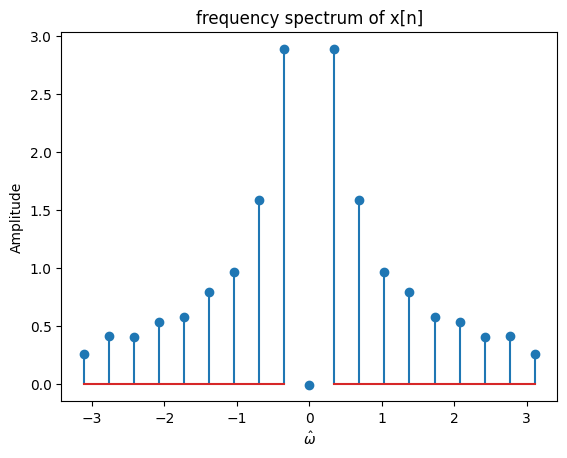

In [74]:
#fill array with signal
samples = 19
n = np.arange(0, samples, 1)
sigArr = []
for x in range(0, samples):
    sigArr.append(x_n(x))
    
yf = fft(sigArr)
yf = list(yf)
dc = yf[0]
yf.pop(0)
xf = []
xfNeg = []
positiveFreq=yf[0:- 9]
negativeFreq=yf[9:]
#negativeFreq = negativeFreq.reverse()
for x in range(1, 10):
    xf.append(x * 0.11 * np.pi)
    
for x in range(1, 10):
    xfNeg.append(- x * 0.11 * np.pi)
    

plt.title("frequency spectrum of x[n]")

plt.xlabel(r'$\hat\omega$')
plt.ylabel('Amplitude')
plt.stem(xf, np.abs(positiveFreq))
plt.stem(xfNeg, np.abs(negativeFreq[::-1]))
plt.stem(0, dc)

<StemContainer object of 3 artists>

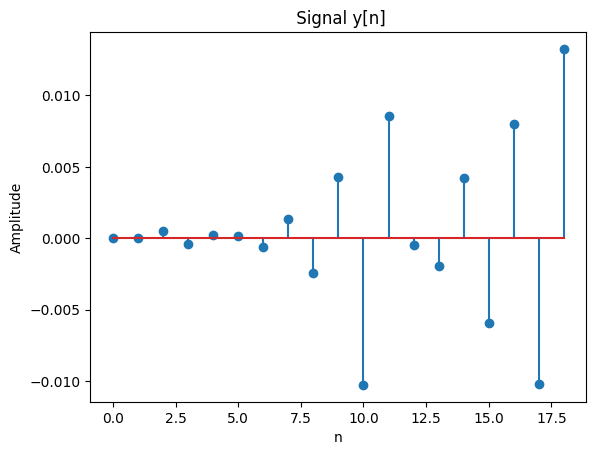

In [76]:
#signal through filter
#signal.dlti(num, den)


#feed-forward terms
z = sp.Symbol('z')
ffList = []
#ffList.append((z - 1))
ffList.append(1)
for i in range (1, 5):
    ffList.append((1 - z**-1 * sp.exp(-0.11j * sp.pi * (2 * i - 1))) * (1 - z**-1 * sp.exp(0.11j * sp.pi * (2 * i - 1))))
    ffList[0] *= (z - sp.exp(-0.11j * sp.pi * (2 * i - 1))) * (z - sp.exp(0.11j * sp.pi * (2 * i - 1)))

num = sp.poly(ffList[0], domain="CC")

#feedback terms
z = sp.Symbol('z')
fbList = []
fbList.append(100)
for i in range (1, 5):
    fbList[0] *= (z - 0.9 * sp.exp(-0.22j * sp.pi * i)) * ((z - 0.9 * sp.exp(0.22j * sp.pi * i)))

#convert to polynomial
num = sp.poly(ffList[0], domain="CC")
den = sp.poly(fbList[0], domain="CC")

# numCoeffs = [1, -2.09, 2.21, -2.28, 2.3, -2.3, 2.28, -2.21, 2.09] #FIXA!!
# denCoeffs = [100, 81.65, 77.83, 67.04, 62.75, 54.31, 51.06, 43.39, 43.05]

numCoeffsNew = [1, -2.09, 2.21, -2.28, 2.3, -2.3, 2.28, -2.21, 2.09, -1]
denCoeffs = [100, 81.65, 77.83, 67.04, 62.75, 54.31, 51.06, 43.39, 43.05, 0, 0]


system = signal.TransferFunction(numCoeffsNew, denCoeffs, dt=1)
response = signal.dlsim(system, sigArr)
r = response[1]


#response = list(response)
dc = yf[0]
#response.pop(0)
#response = ifft(response)

plt.title(r' Signal y[n]')
plt.xlabel("n")
plt.ylabel('Amplitude')
plt.stem(response[0], response[1])


<StemContainer object of 3 artists>

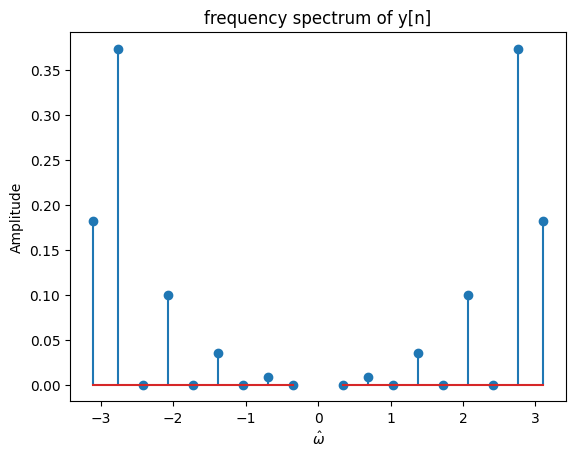

In [78]:
#plot y[n] freq domain----------------------------------------

#every frequency component in signal (multiples of 0.11 * pi)
freqz = []
for x in range(1, 10):
    freqz.append(0.11 * np.pi * x)
responseList = []
#calculate freq response
freqResp = signal.dfreqresp(system, freqz)
for x in range(0, 9):
    responseList.append(positiveFreq[x] * freqResp[0][x] * freqResp[1][x])

    
xf = []
xfNeg = []
for x in range(1, 10):
    xf.append(x * 0.11 * np.pi)
    
for x in range(1, 10):
    xfNeg.append(- x * 0.11 * np.pi)
plt.title("frequency spectrum of y[n]")
plt.xlabel(r'$\hat\omega$')
plt.ylabel('Amplitude')
plt.stem(xf, np.abs(responseList))
plt.stem(xfNeg, np.abs(responseList))

<StemContainer object of 3 artists>

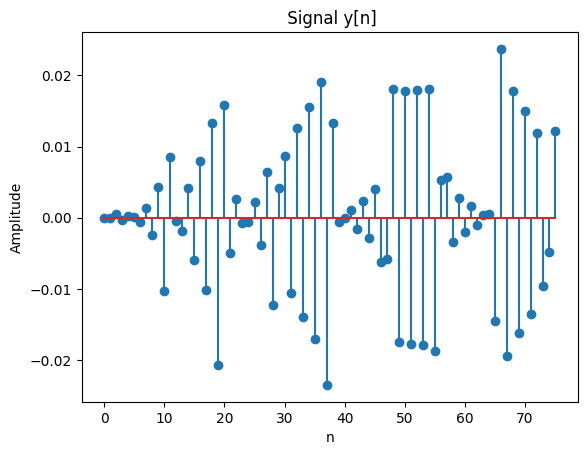

In [80]:
#plot output time domain y[n]
samples = 4*19
n = np.arange(0, samples, 1)
sigArr = []
for x in range(0, samples):
    sigArr.append(x_n(x))
    
system = signal.TransferFunction(numCoeffsNew, denCoeffs, dt=1/4000)
    


ts = 1/4000
t = np.arange(0.0, 2* 0.0045, ts)
n = np.arange(0, samples, 1)
output = signal.dlsim(system, sigArr)


plt.title(r' Signal y[n]')
plt.xlabel("n")
plt.ylabel('Amplitude')

plt.stem(n, output[1])

<StemContainer object of 3 artists>

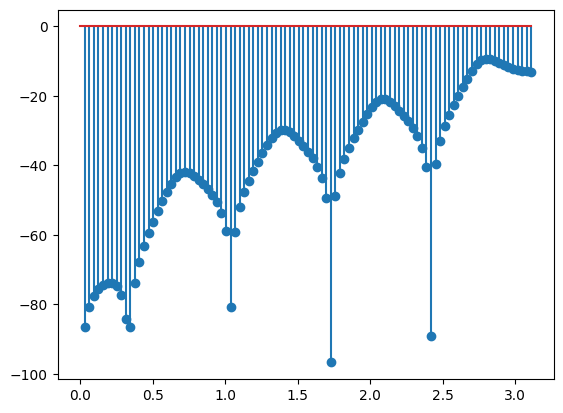

In [90]:
#signal through filter
#signal.dlti(num, den)


#feed-forward terms
z = sp.Symbol('z')
ffList = []
#ffList.append((z - 1))
ffList.append((1 - z**-1))
ffList.append(1)
for i in range (1, 5):
    #ffList.append((1 - z**-1 * sp.exp(-0.11j * sp.pi * (2 * i - 1))) * (1 - z**-1 * sp.exp(0.11j * sp.pi * (2 * i - 1))))
    #ffList[0] *= (z - sp.exp(-0.11j * sp.pi * (2 * i - 1))) * (z - sp.exp(0.11j * sp.pi * (2 * i - 1)))
    ffList[0] *= (1 - z**-1 * sp.exp(-0.11j * sp.pi * (2 * i - 1))) * (1 - z**-1 * sp.exp(0.11j * sp.pi * (2 * i - 1)))

num = sp.poly(ffList[0], domain="CC")

#feedback terms
z = sp.Symbol('z')
fbList = []
fbList.append(100 * z)
for i in range (1, 5):
    #fbList[0] *= (z - 0.9 * sp.exp(-0.22j * sp.pi * i)) * ((z - 0.9 * sp.exp(0.22j * sp.pi * i)))
    fbList[0] *= (1 - 0.9 * z**-1 * sp.exp(-0.22j * sp.pi * i)) * ((1 - 0.9 * z**-1 * sp.exp(0.22j * sp.pi * i)))

#convert to polynomial
num = sp.poly(ffList[0] * z**9, domain="CC")
den = sp.poly(fbList[0] * z**9, domain="CC")

numCoeffsNew = [1, -2.09, 2.21, -2.28, 2.3, -2.3, 2.28, -2.21, 2.09, -1]
denCoeffs = [100, 81.65, 77.83, 67.04, 62.75, 54.31, 51.06, 43.39, 43.05, 0, 0]

system2 = signal.TransferFunction(numCoeffsNew, denCoeffs, dt=1)

response = signal.dlsim(system2, sigArr)
#response = response[0]

#response = list(response)
dc = yf[0]
#response.pop(0)
#response = ifft(response)
system2
fRes = signal.dbode(system2)
plt.stem(fRes[0], fRes[1])
#plt.stem(-np.flip(fRes[0]), np.flip(fRes[1]))
#fRes
#sp.simplify(num)


<StemContainer object of 3 artists>

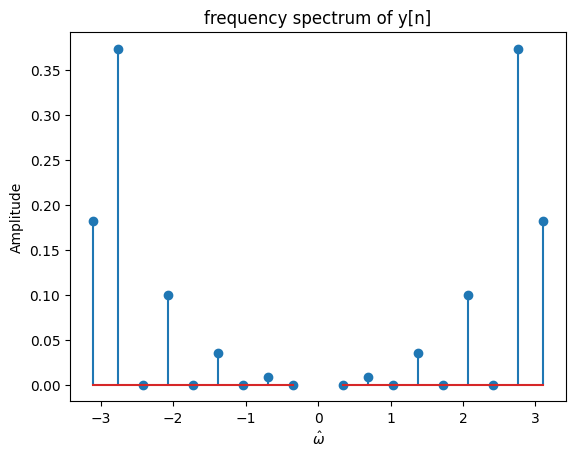

In [83]:
#plot y[n] freq domain----------------------------------------

freqz = []
for x in range(1, 10):
    freqz.append(0.11 * np.pi * x)
responseList = []
#calculate freq response
freqResp = signal.dfreqresp(system, freqz)
for x in range(0, 9):
    responseList.append(positiveFreq[x] * freqResp[0][x] * freqResp[1][x])

    
xf = []
xfNeg = []
for x in range(1, 10):
    xf.append(x * 0.11 * np.pi)
    
for x in range(1, 10):
    xfNeg.append(- x * 0.11 * np.pi)
plt.title("frequency spectrum of y[n]")
plt.xlabel(r'$\hat\omega$')
plt.ylabel('Amplitude')
plt.stem(xf, np.abs(responseList))
plt.stem(xfNeg, np.abs(responseList))

<StemContainer object of 3 artists>

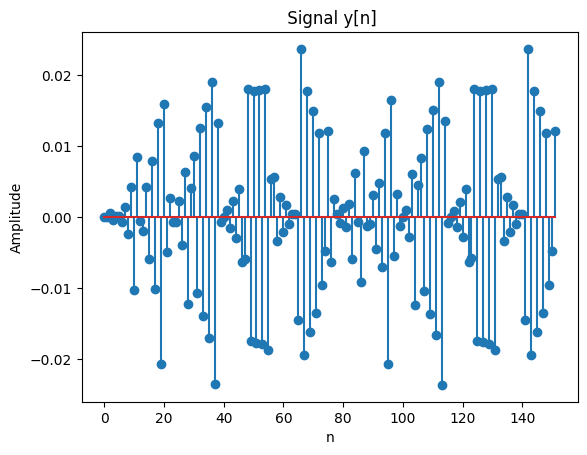

In [84]:
#plot freq kvall
arr = sigArr + sigArr 
arr = np.asarray(arr)
response = signal.dlsim(system2, arr)

plt.title(r' Signal y[n]')
plt.xlabel("n")
plt.ylabel('Amplitude')
plt.stem(response[0], response[1])

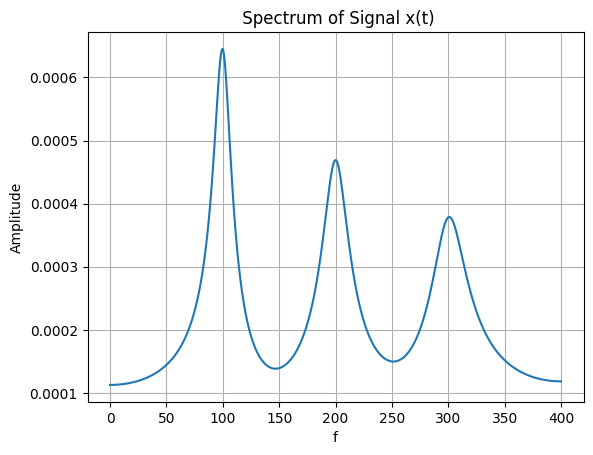

In [53]:
#Part 2
def sig_t(t):
    return sp.exp(-50 * t) * sp.cos(2 * sp.pi * 100 * t) + sp.exp(-75 * t) * sp.cos(2 * sp.pi * 200 * t) + sp.exp(-100 * t) * sp.cos(2 * sp.pi * 300 * t)

N = 30000

# sample spacing

T = 1.0 / 800.0
t = np.linspace(0.0, N*T, N, endpoint=False)
#y = sp.exp(-50 * t) * sp.cos(2 * sp.pi * 100 * t) + sp.exp(-75 * t) * sp.cos(2 * sp.pi * 200 * t) + sp.exp(-100 * t) * sp.cos(2 * sp.pi * 300 * t)
y = np.exp(-50 * t) * np.cos(2 * np.pi * 100 * t) + np.exp(-75 * t) * np.cos(2 * np.pi * 200 * t) + np.exp(-100 * t) * np.cos(2 * np.pi * 300 * t)
yf = fft(y)
xf = fftfreq(N, T)[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))

plt.grid()
plt.title(r' Spectrum of Signal x(t)')
plt.xlabel("f")
plt.ylabel('Amplitude')

plt.show()

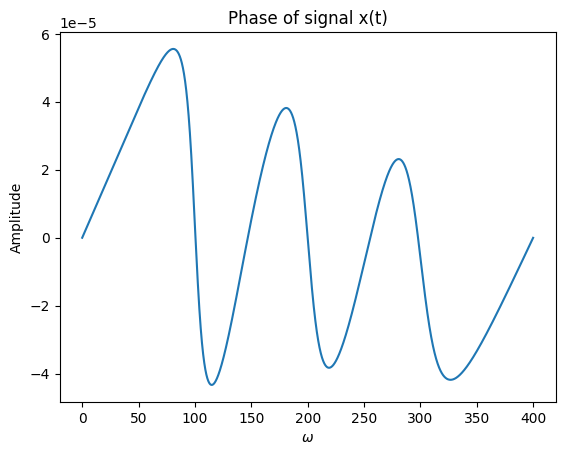

In [61]:
angles = np.angle(yf)
plt.title(r'Phase of signal x(t)')
plt.xlabel(r'$\omega$')
plt.ylabel('Amplitude')
plt.plot(xf, 2.0/N * np.angle(yf[0:N//2]))

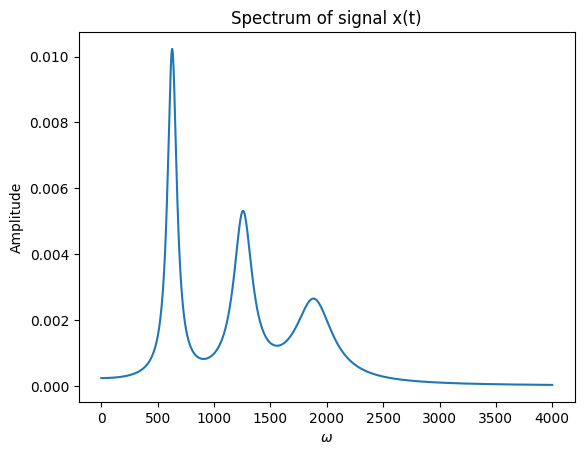

In [59]:
def f(w):
    return (50+1j*w)/((50+1j*w)**2+(200 * np.pi)**2)+(100+1j*w)/((100+1j*w)**2+(400
* np.pi)**2)+(200+1j*w)/((200+1j*w)**2+(600 * np.pi)**2)

e = np.arange(0, 4000, 0.5)
plt.title(r'Spectrum of signal x(t)')
plt.xlabel(r'$\omega$')
plt.ylabel('Amplitude')
plt.plot(e, f(e))

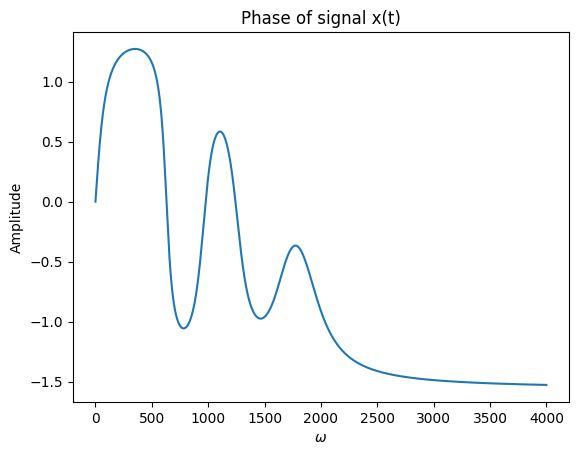

In [60]:
#angles = np.angle((50+1j*w)/((50+1j*w)**2+(200 * np.pi)**2)+(100+1j*w)/((100+1j*w)**2+(400
#* np.pi)**2)+(200+1j*w)/((200+1j*w)**2+(600 * np.pi)**2))
#angles = np

#e = np.arange(0, 600, 1)
#plt.plot(e, angles)

def ang(w):
    return np.angle(f(w))

e = np.arange(0, 4000, 0.5)

plt.title(r'Phase of signal x(t)')
plt.xlabel(r'$\omega$')
plt.ylabel('Amplitude')

plt.plot(e, ang(e))